In [1]:
import json
def load_json(file_path):
    """
    Load a JSON file and return its content as a Python dictionary.

    Parameters:
        file_path (str): The path to the JSON file.

    Returns:
        dict: The content of the JSON file as a dictionary.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data
def save_json(data, file_path):
    """
    Save a Python dictionary to a JSON file.

    Parameters:
        data (dict): The data to save.
        file_path (str): The path where the JSON file will be saved.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

In [2]:
path_list = [
"/data_ssd/PASCAL-VOC/check_length/paligemma_actual_detection/check-length_test_pascal-voc_actual_detection_for_paligemma_sort_size_cat_size.json",
"/data_ssd/PASCAL-VOC/check_length/paligemma_actual_detection/check-length_train_pascal-voc_actual_detection_for_paligemma_sort_size_cat_size.json",
"/data_ssd/PASCAL-VOC/check_length/paligemma_actual_detection/check-length_val_pascal-voc_actual_detection_for_paligemma_sort_size_cat_size.json",
]

In [3]:
data = []
for path in path_list:
    data.extend(load_json(path))

In [4]:
print(data[0])

{'total_ids_length': 331, 'input_ids_length': 318, 'output_ids_length': 13, 'source': {'id': '000001', 'image': 'PASCAL-VOC/ultralytics/images/test2007/000001.jpg', 'conversations': [{'from': 'human', 'value': '<image>Detect objects in this image from the following categories: [aeroplane ; bicycle ; bird ; boat ; bottle ; bus ; car ; cat ; chair ; cow ; diningtable ; dog ; horse ; motorbike ; person ; pottedplant ; sheep ; sofa ; train ; tvmonitor]. List detected categories only.'}, {'from': 'gpt', 'value': '<loc0023><loc0020><loc1017><loc1017> person ; <loc0489><loc0136><loc0757><loc0562> dog'}], 'gt_entities_quantized_normalized': [['person', [[0.019550342130987292, 0.022482893450635387, 0.9941348973607038, 0.9941348973607038]]], ['dog', [[0.13294232649071358, 0.4780058651026393, 0.5493646138807429, 0.739980449657869]]]], 'gt_entities_normalized': [['person', [[0.01983002832861197, 0.02200000000000002, 0.9943342776203967, 0.994]]], ['dog', [[0.1331444759206799, 0.478, 0.5495750708215

In [5]:
length_list = []
for index, item in enumerate(data):
    # print(index)
    length = item["total_ids_length"]
    length_list.append(length)
print(f"max length: {max(length_list)}")

max length: 629


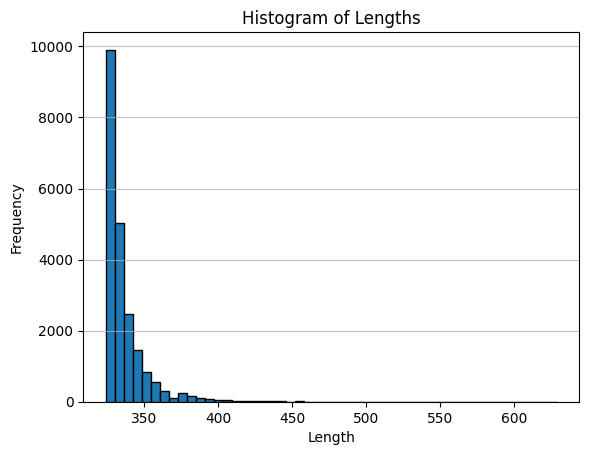

In [6]:
import matplotlib.pyplot as plt
plt.hist(length_list, bins=50, edgecolor='black')
plt.title('Histogram of Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
max_output_len = 128 + 256
under_max_list = [l for l in length_list if l <= max_output_len]
print(f"max length under {max_output_len}: {max(under_max_list)}")

max length under 384: 384


In [8]:
print(len(data))
print(len(under_max_list))

21503
21112


# 切り詰めjson作成

In [9]:
max_output_len = 384
path_dict = {
"train": "/data_ssd/PASCAL-VOC/check_length/paligemma_actual_detection/check-length_train_pascal-voc_actual_detection_for_paligemma_sort_size_cat_size.json",
"val": "/data_ssd/PASCAL-VOC/check_length/paligemma_actual_detection/check-length_val_pascal-voc_actual_detection_for_paligemma_sort_size_cat_size.json",
}

save_path_dict = {
"train": "/data_ssd/PASCAL-VOC/paligemma_actual_detection/train_pascal-voc_actual_detection_for_paligemma_sort_size_cat_size_under384.json",
"val": "/data_ssd/PASCAL-VOC/paligemma_actual_detection/val_pascal-voc_actual_detection_for_paligemma_sort_size_cat_size_under384.json",
}

for key in path_dict.keys():
    data = load_json(path_dict[key])
    new_data = [item["source"] for item in data if item["total_ids_length"] <= max_output_len]
    print(f"{key}: {len(data)} -> {len(new_data)}")
    save_json(new_data, save_path_dict[key])

train: 14041 -> 13795
val: 2510 -> 2450
